# <u> Dissecting racial bias in an algorithm used to manage the health of populations </u>

# Part A: Data Access

In [2]:
import pandas as pd
url = "https://gitlab.com/labsysmed/dissecting-bias/-/raw/master/data/data_new.csv?inline=false"
df = pd.read_csv(url)

In [2]:
df

,risk_score_t,program_enrolled_t,cost_t,cost_avoidable_t,bps_mean_t,ghba1c_mean_t,hct_mean_t,cre_mean_t,ldl_mean_t,race,...,trig_min-high_tm1,trig_min-normal_tm1,trig_mean-low_tm1,trig_mean-high_tm1,trig_mean-normal_tm1,trig_max-low_tm1,trig_max-high_tm1,trig_max-normal_tm1,gagne_sum_tm1,gagne_sum_t
0,1.987430,0,1200.0,0.0,NaN,5.4,NaN,1.110000,194.0,white,...,0,0,0,0,0,0,0,0,0,0
1,7.677934,0,2600.0,0.0,119.0,5.5,40.4,0.860000,93.0,white,...,0,1,0,0,1,0,0,1,4,3
2,0.407678,0,500.0,0.0,NaN,NaN,NaN,NaN,NaN,white,...,0,0,0,0,0,0,0,0,0,0
3,0.798369,0,1300.0,0.0,117.0,NaN,NaN,NaN,NaN,white,...,0,0,0,0,0,0,0,0,0,0
4,17.513165,0,1100.0,0.0,116.0,NaN,34.1,1.303333,53.0,white,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48779,0.611517,0,800.0,0.0,NaN,NaN,NaN,1.090000,148.0,white,...,0,0,0,0,0,0,0,0,0,0
48780,2.615933,0,2200.0,0.0,112.0,NaN,41.4,0.810000,172.0,white,...,0,1,0,0,1,0,0,1,1,1
48781,1.358926,0,800.0,0.0,105.0,NaN,NaN,NaN,NaN,white,...,0,1,0,0,1,0,0,1,1,0
48782,10.990318,0,1300.0,0.0,132.0,NaN,NaN,NaN,NaN,white,...,0,0,0,0,0,0,0,0,3,3


# Part B: Reproduce Fig. 1

Visualize risk score percentiles against mean number of active chronic conditions within that percentile. For example, I thought I would try spliting out male and female patients. I also think the figure looks a bit nicer with axes inverted. 

/var/folders/g2/ybhd80ns31sc72zl62c5qcjm0000gn/T/ipykernel_38637/3664818710.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_female["chronic_illness_mean"] = df_female.groupby("risk_score_t")["gagne_sum_t"].transform("mean")
/var/folders/g2/ybhd80ns31sc72zl62c5qcjm0000gn/T/ipykernel_38637/3664818710.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_male["chronic_illness_mean"] = df_male.groupby("risk_score_t")["gagne_sum_t"].transform("mean")


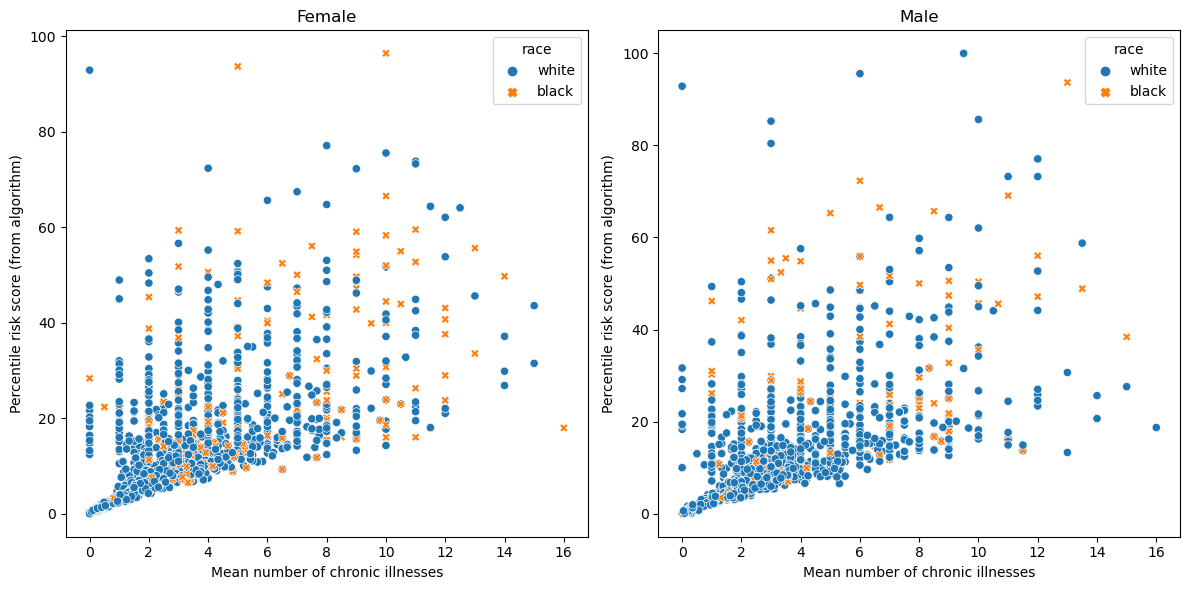

In [4]:
import seaborn as sns
from matplotlib import pyplot as plt

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for females
df_female = df[df["dem_female"] == True]
df_female["chronic_illness_mean"] = df_female.groupby("risk_score_t")["gagne_sum_t"].transform("mean")
sns.scatterplot(data=df_female, x="chronic_illness_mean", y="risk_score_t", hue="race", style="race", ax=axes[0])
axes[0].set_xlabel('Mean number of chronic illnesses')
axes[0].set_ylabel('Percentile risk score (from algorithm)')
axes[0].set_title('Female')

# Plot for males
df_male = df[df["dem_female"] == False]
df_male["chronic_illness_mean"] = df_male.groupby("risk_score_t")["gagne_sum_t"].transform("mean")
sns.scatterplot(data=df_male, x="chronic_illness_mean", y="risk_score_t", hue="race", style="race", ax=axes[1])
axes[1].set_xlabel('Mean number of chronic illnesses')
axes[1].set_ylabel('Percentile risk score (from algorithm)')
axes[1].set_title('Male')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

Include a brief discussion of the meaning of this plot. Suppose that Patient A is Black, that Patient B is White, and that both Patient A and Patient B have exactly the same chronic illnesses. Are Patient A and Patient B equally likely to be referred to the high-risk care management program?

# Part C: Reproduce Fig. 3

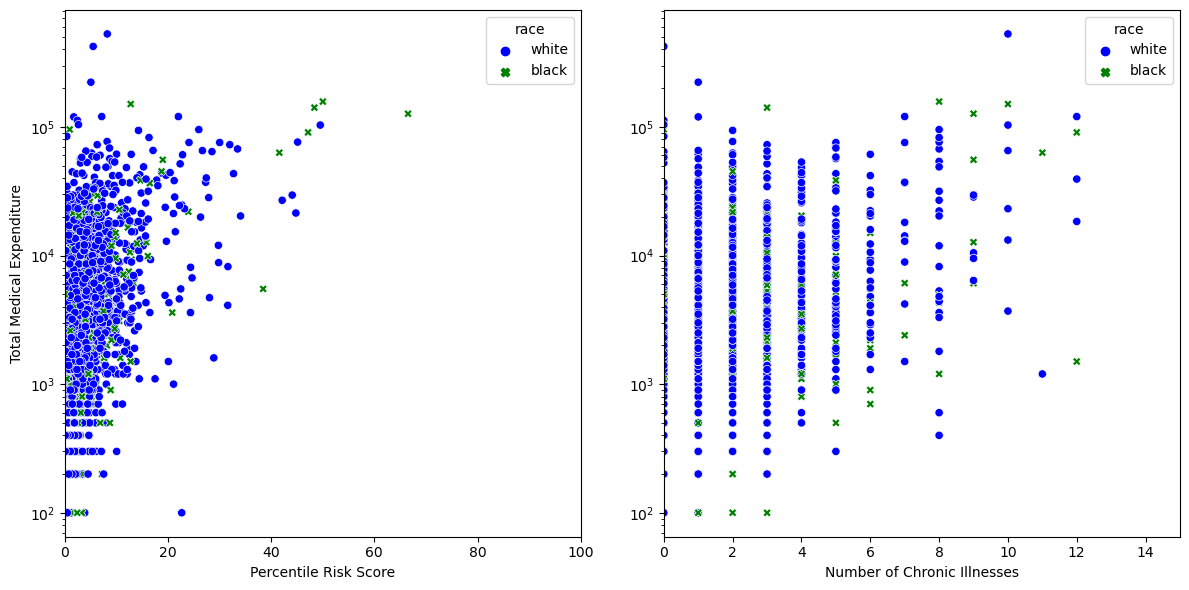

In [18]:
import seaborn as sns
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
custom_palette = ["blue", "green"]


# Plot for females
sns.scatterplot(data=sampled_df, y="cost_t", x="risk_score_t", hue="race", style="race", ax=axes[0], palette=custom_palette)
axes[0].set_xlabel('Percentile Risk Score')
axes[0].set_ylabel('Total Medical Expenditure')
axes[0].set_yscale('log')
axes[0].set_xlim(0, 100)

# Plot for males
sns.scatterplot(data=sampled_df, y="cost_t", x="gagne_sum_t", hue="race", style="race", ax=axes[1], palette=custom_palette)
axes[1].set_xlabel('Number of Chronic Illnesses')
axes[1].set_ylabel(' ')
axes[1].set_yscale('log')
axes[1].set_xlim(0, 15)

plt.tight_layout()
plt.show()